In [12]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from numpy.random import seed
seed(0)

In [13]:
!pip -q install yfinance
import yfinance as yf

In [14]:
IBEX = yf.Ticker("^IBEX")
IBEX.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 11147.5,
 'open': 11109.8,
 'dayLow': 11051.3,
 'dayHigh': 11144.5,
 'regularMarketPreviousClose': 11147.5,
 'regularMarketOpen': 11109.8,
 'regularMarketDayLow': 11051.3,
 'regularMarketDayHigh': 11144.5,
 'volume': 126060377,
 'regularMarketVolume': 126060377,
 'averageVolume': 146378928,
 'averageVolume10days': 98750940,
 'averageDailyVolume10Day': 98750940,
 'bid': 11066.2,
 'ask': 11071.5,
 'fiftyTwoWeekLow': 8879.3,
 'fiftyTwoWeekHigh': 11469.9,
 'fiftyDayAverage': 11173.696,
 'twoHundredDayAverage': 10364.253,
 'currency': 'EUR',
 'exchange': 'MCE',
 'quoteType': 'INDEX',
 'symbol': '^IBEX',
 'underlyingSymbol': '^IBEX',
 'shortName': 'IBEX 35...',
 'longName': 'IBEX 35...',
 'firstTradeDateEpochUtc': 742460400,
 'timeZoneFullName': 'Europe/Madrid',
 'timeZoneShortName': 'CEST',
 'uuid': '27b23394-5d7d-3536-8476-fa4905cef873',
 'messageBoardId': 'finmb_INDEXIBEX',
 'gmtOffSetMilliseconds': 7200000,
 'trailingPegRatio': None}

In [15]:
# get historical market data
IBEX_values = IBEX.history(start="2016-01-01",end="2021-03-01")

In [16]:
IBEX_values.index = pd.to_datetime(IBEX_values.index)
IBEX_values.index = IBEX_values.index.date

IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2016-01-04,9429.789917,9440.890491,9263.690482,9313.190430,279173100,0.0,0.0
2016-01-05,9431.490134,9446.190314,9260.190508,9335.190430,208637600,0.0,0.0
2016-01-06,9330.289898,9330.289898,9122.589923,9197.390625,288658500,0.0,0.0
2016-01-07,8973.791099,9102.991169,8889.691571,9059.291016,395763700,0.0,0.0
2016-01-08,9093.290834,9137.990985,8909.191406,8909.191406,310720000,0.0,0.0
...,...,...,...,...,...,...,...
2021-02-22,8119.600098,8126.299805,8045.299805,8112.200195,221465900,0.0,0.0
2021-02-23,8128.000000,8259.900391,8107.600098,8252.099609,293160800,0.0,0.0
2021-02-24,8266.599609,8311.500000,8205.200195,8269.599609,225852700,0.0,0.0
2021-02-25,8331.200195,8387.000000,8310.700195,8317.799805,309755000,0.0,0.0


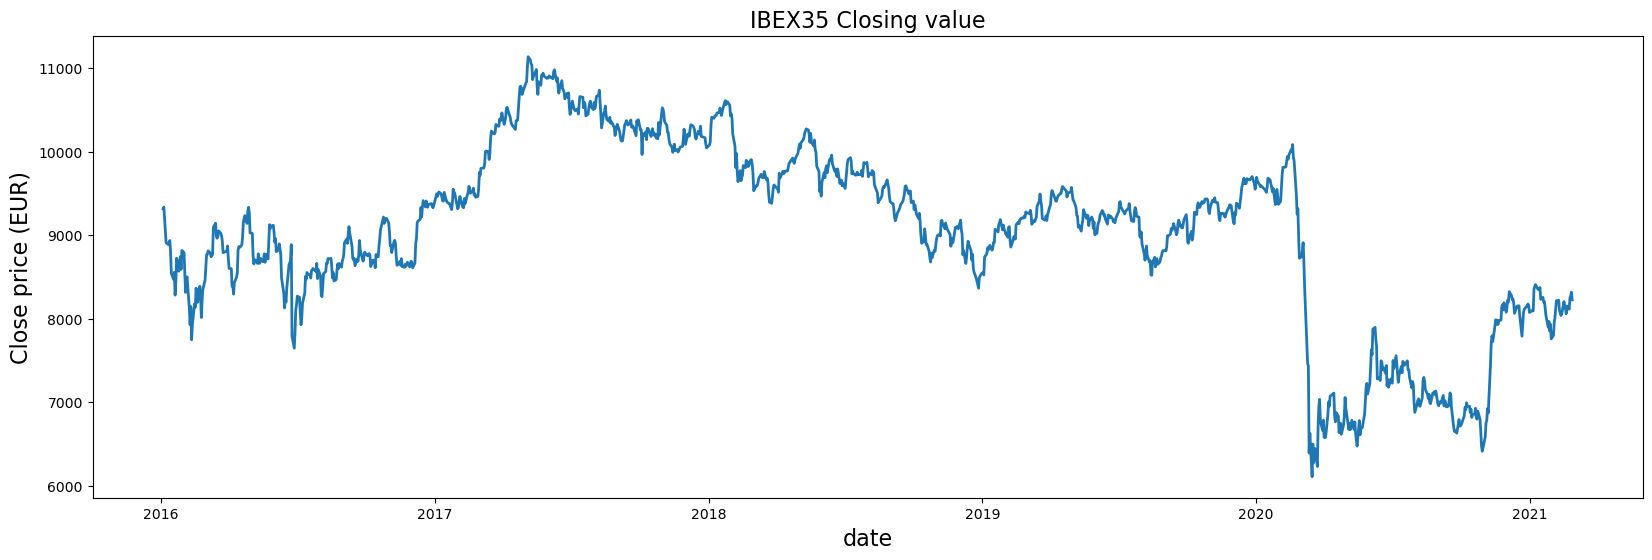

In [17]:
plt.figure(figsize=(20,6))
plt.plot(IBEX_values.index, IBEX_values['Close'], lw=2)
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

In [18]:
# convert the Date column into a pandas datatime format
#IBEX_values.index = pd.to_datetime(IBEX_values.index)
IBEX_values = IBEX_values.reset_index().rename(columns={'index': 'Date'})

In [19]:
from sklearn.preprocessing import MinMaxScaler
# rescale the whole dataset (ideally this should be done seperately on the train and test data in order to prevent data leakage, 
#in particular 'look-ahead bias')
scaler = MinMaxScaler(feature_range=(0, 1))
#train_series = scaler.fit_transform(train_series)
IBEX_values['Close'] = scaler.fit_transform(IBEX_values[['Close']])

In [20]:
# Train / test split using boolean indexing
train_data = IBEX_values[IBEX_values['Date'] < pd.to_datetime("2020-01-01").date()].reset_index(drop=True)
test_data = IBEX_values[IBEX_values['Date'] >= pd.to_datetime("2020-01-01").date()].reset_index(drop=True)

print(train_data.head())
print(test_data.head())

         Date         Open         High          Low     Close     Volume  \
0  2016-01-04  9429.789917  9440.890491  9263.690482  0.637602  279173100   
1  2016-01-05  9431.490134  9446.190314  9260.190508  0.641977  208637600   
2  2016-01-06  9330.289898  9330.289898  9122.589923  0.614572  288658500   
3  2016-01-07  8973.791099  9102.991169  8889.691571  0.587107  395763700   
4  2016-01-08  9093.290834  9137.990985  8909.191406  0.557255  310720000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
         Date         Open         High          Low     Close     Volume  \
0  2020-01-02  9639.099609  9705.400391  9615.099609  0.712780  142379600   
1  2020-01-03  9631.200195  9650.700195  9581.200195  0.703910  135130000   
2  2020-01-06  9585.400391  9618.200195  9492.700195  0.694821  103520400   
3  2020-01-07  9623.099609  9657.900391  9557.900391  0

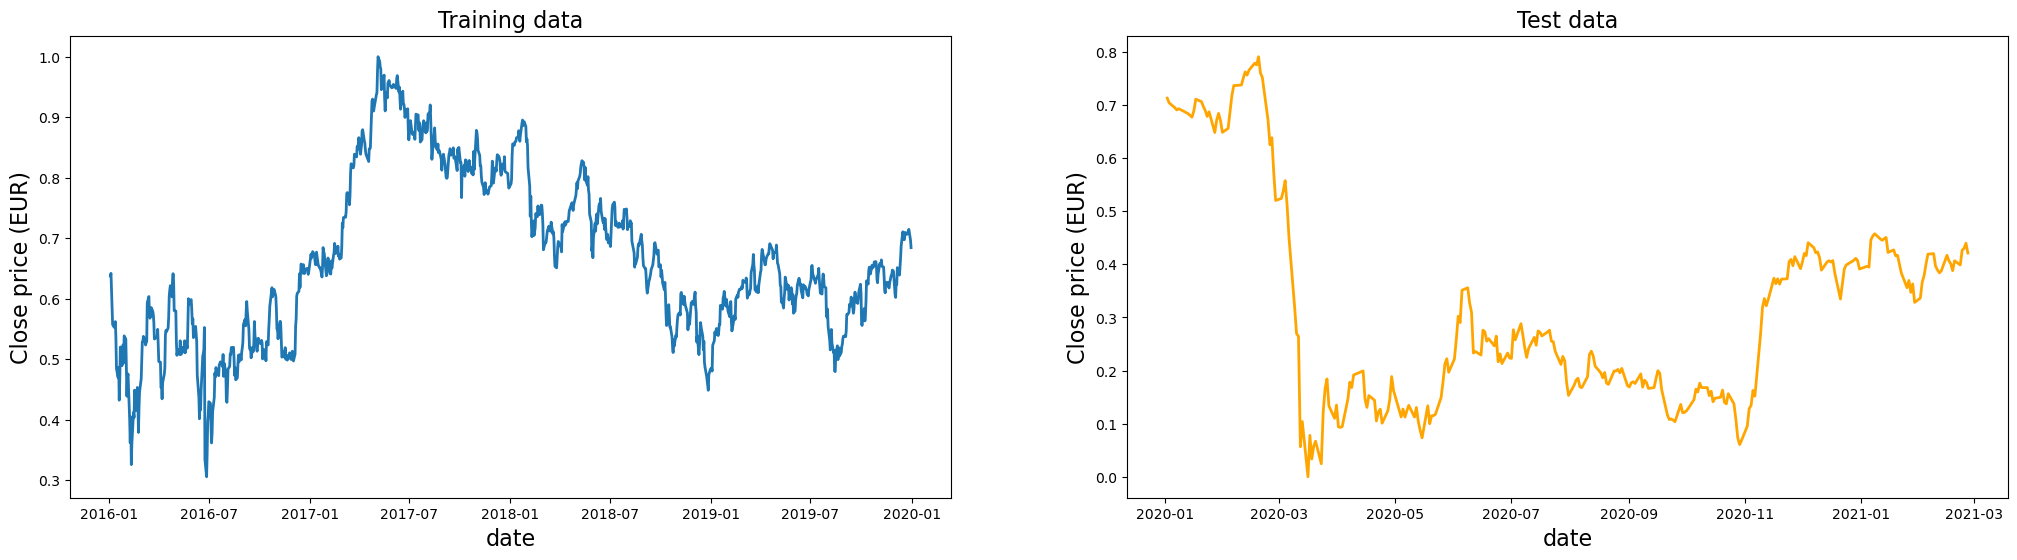

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train_data.Date, train_data['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test_data.Date, test_data['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

In [22]:
X_train = train_data.Date
y_train = train_data['Close']

X_test = test_data.Date
y_test = test_data['Close']

n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
#time

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

look_back = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse');

model.fit(train_generator,epochs=300, verbose=0);


In [27]:
test_predictions  = model.predict(test_generator)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


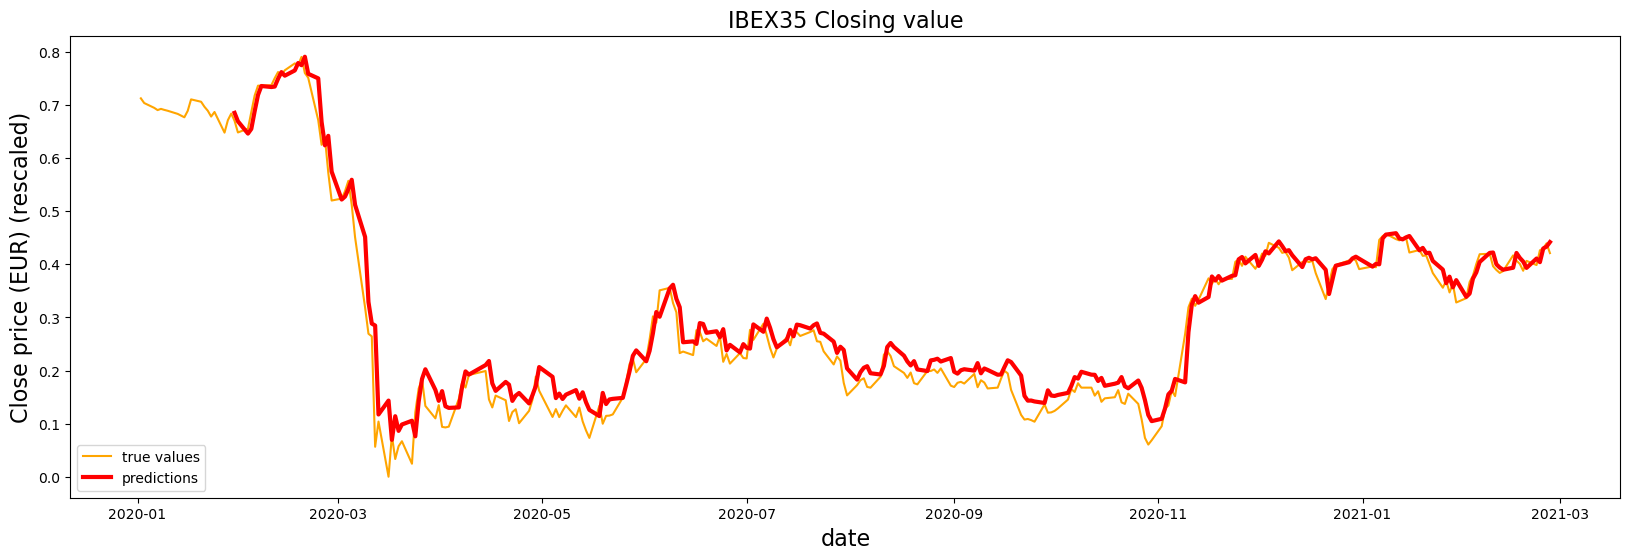

In [29]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

TypeError: unsupported operand type(s) for -: 'int' and 'Timedelta'

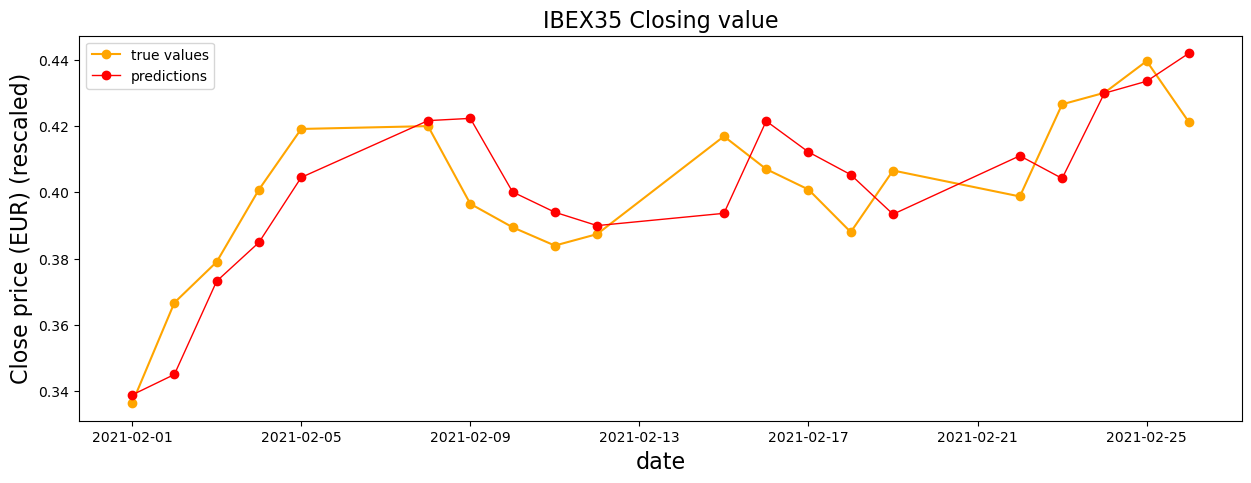

In [31]:
n_days = 20
last_n_days = len(test_data)-n_days

plt.figure(figsize=(15,5))
plt.plot(test_data.Date[last_n_days:], test_data['Close'][last_n_days:], c='orange',marker='o',label='true values')
plt.plot(X_test[last_n_days:],test_predictions[last_n_days-20:],lw=1, c='r', marker='o', label='predictions')
plt.legend(loc="upper left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16)

# shade in the days for better visualization
date2 = IBEX_values.tail(1).index.item()
date1 = date2 - pd.Timedelta(days=n_days+7) # days added for weekends etc.
for i in pd.date_range(date1, date2, periods=n_days+8):
    # shade in 0.6 of each day
    plt.axvspan(i,i+pd.Timedelta(days=0.6), facecolor='lightgrey', alpha=0.2)
plt.show();

In [32]:
extrapolation = list()
seed_batch    = y_test[:look_back].values.reshape((1,look_back, n_features))
current_batch = seed_batch

for i in range(len(test_data)):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

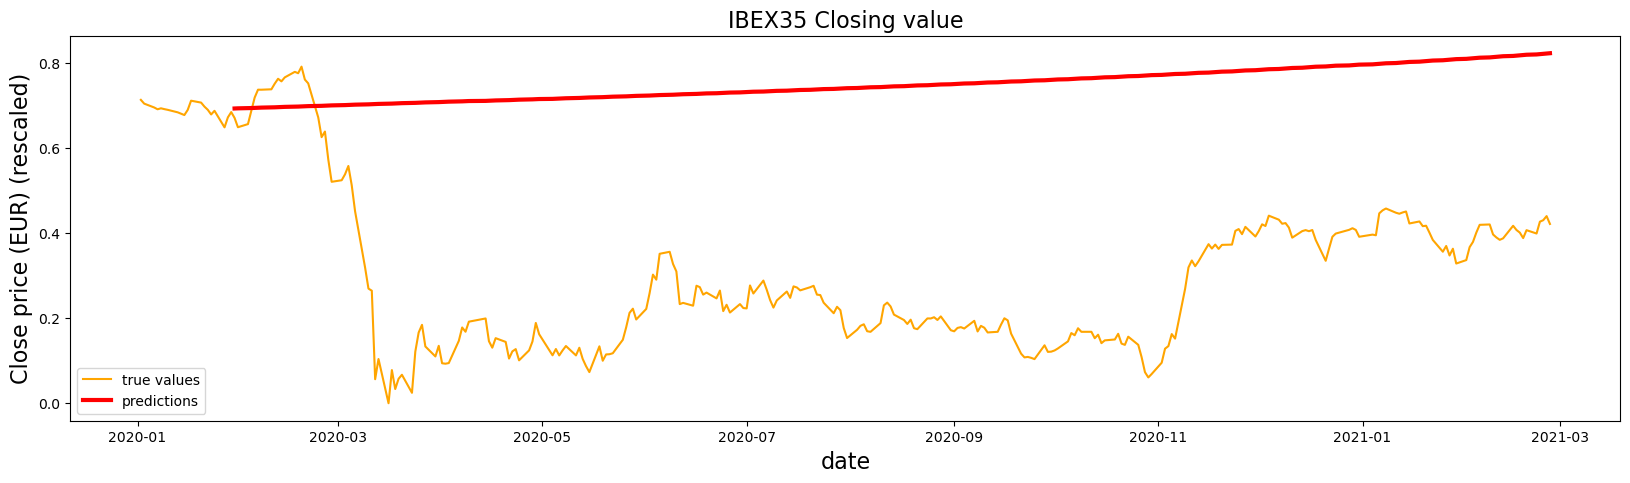

In [33]:
plt.figure(figsize=(20,5))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],extrapolation[20:], lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

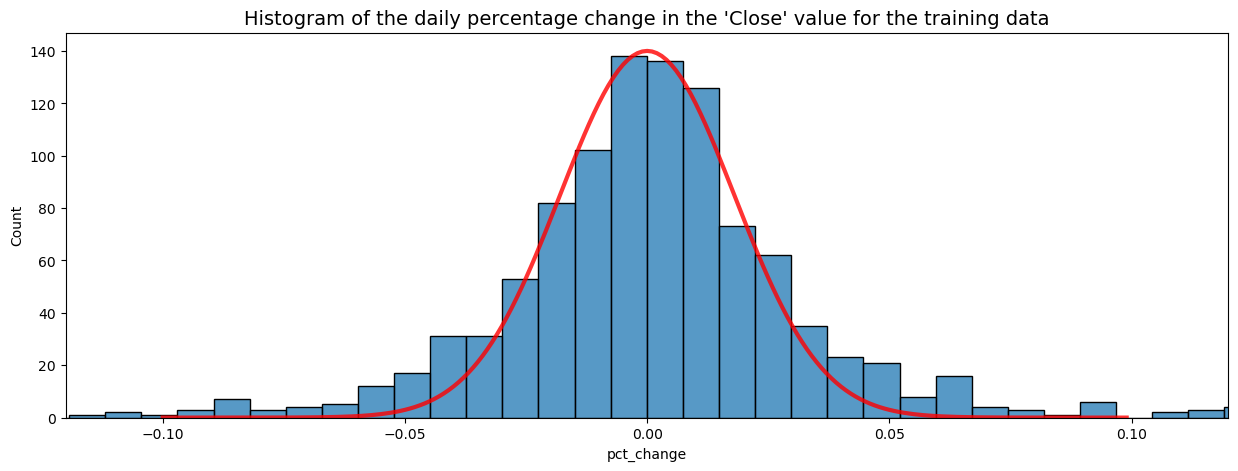

In [34]:
train_data['pct_change'] = train_data.Close.pct_change(periods = 1)

x = np.arange(-0.1, 0.1, 0.001)

# define a Gaussian function
def Gaussian(x,mu,sigma,A):
    return A*np.exp(-0.5 * ((x-mu)/sigma)**2)

plt.figure(figsize = (15,5))
ax = sns.histplot(train_data['pct_change'], binwidth=0.0075)
# overlay a Gaussian distribution, parameters were picked by eye
ax = plt.plot(x,Gaussian(x,0,0.018,140),color='r',lw=3,label='Gaussian #1', alpha=0.8)
plt.title("Histogram of the daily percentage change in the 'Close' value for the training data", size=14)
plt.xlim(-0.12, 0.12);

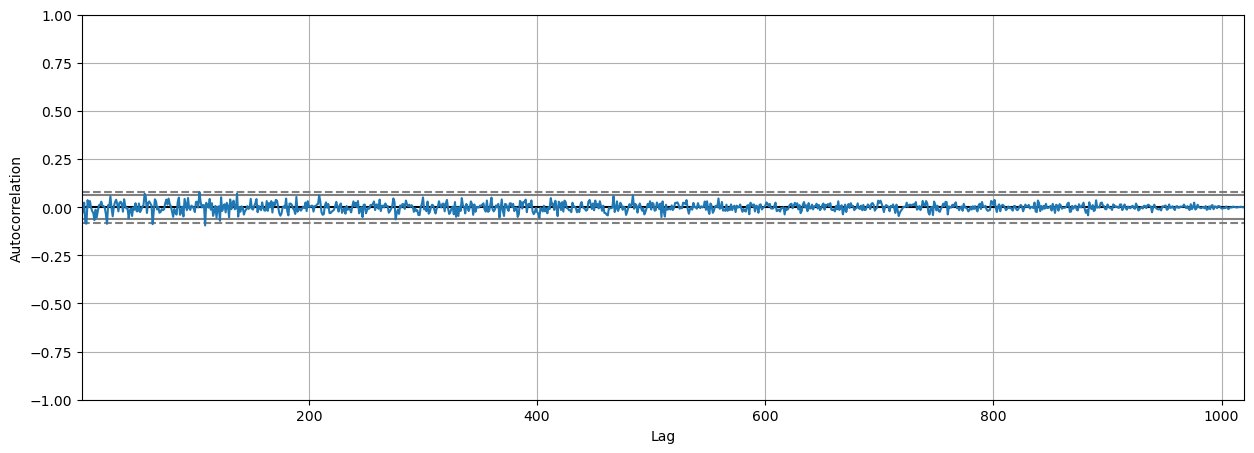

In [35]:
diff_train_data_close = train_data['Close'].diff()
# drop the initial nan
diff_train_data_close = diff_train_data_close.dropna()
# now for the autocorrelation plot
rcParams['figure.figsize'] = 15, 5
pd.plotting.autocorrelation_plot(diff_train_data_close);

In [36]:
# create a naïve forecast
test_data['naive'] = test_data['Close'].shift(1)

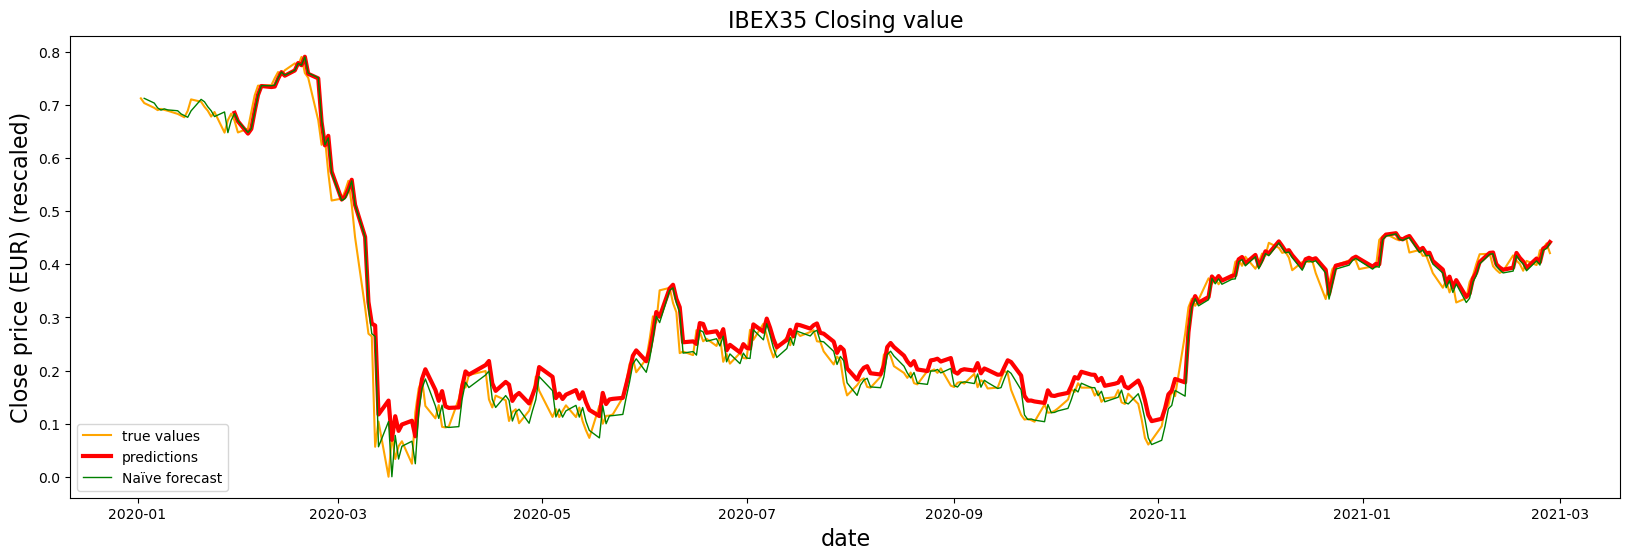

In [37]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.plot(test_data.Date,test_data['naive'], lw=1, c='green',linestyle = '-', label='Naïve forecast')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

In [38]:
# first create a pad of length "look_back"
twenty_zeros = np.zeros((look_back,1))
# now insert the LSTM predictions into the dataframe
test_data["LSTM"] = np.concatenate([twenty_zeros,test_predictions])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

print("Naïve model MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))
print("Naïve model MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))

Naïve model MSE: 0.0009
LSTM model  MSE: 0.0013
Naïve model MAE: 0.0151
LSTM model  MAE: 0.0205
